In [1]:
import pandas as pd
import pmdarima as pm
import numpy as np
import matplotlib.pyplot as plt

from functions import gridsearch_timeseriessplit_arima
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

In [2]:
df = pd.read_csv('training_dataset.csv', index_col='date', parse_dates=True)

In [3]:
df.index.freq = "D"

In [4]:
df.head()

,eth_low,eth_high,eth_open,eth_close,eth_volume,month,eth_qav,eth_num_trades,eth_taker_base_vol,eth_taker_quote_vol,...,stochastic_oscillator,ma_12,ma_26,ema_12,ema_26,obv,mfi,upper_band,middle_band,lower_band
date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,383.18,394.39,386.44,388.46,4198.68434,2017-09-01,1.635228e+06,4124.0,1564.05531,6.096309e+05,...,96.424850,346.524167,338.660000,346.524167,338.660000,1.378006e+06,88.346876,411.653941,341.8790,272.104059
2017-09-02,320.08,394.32,388.58,343.14,8240.32724,2017-09-01,2.904008e+06,8217.0,2460.66776,8.684873e+05,...,97.629707,348.178333,339.773462,348.178333,339.773462,1.369766e+06,80.426793,411.386517,341.6590,271.931483
2017-09-03,320.08,367.28,343.56,341.77,5253.62211,2017-09-01,1.801703e+06,6153.0,2240.91753,7.679383e+05,...,79.514749,350.842500,340.706923,350.842500,340.706923,1.364512e+06,74.419284,408.329187,340.1235,271.917813
2017-09-04,267.94,344.55,339.29,283.77,6737.81061,2017-09-01,2.002446e+06,7403.0,2954.16805,8.770111e+05,...,78.967144,348.178333,339.138077,348.178333,339.138077,1.357774e+06,67.246410,404.443029,335.1070,265.770971
2017-09-05,235.55,321.52,286.81,312.09,8344.41924,2017-09-01,2.397491e+06,8999.0,4312.97282,1.251959e+06,...,55.783836,347.234167,338.443846,347.234167,338.443846,1.366118e+06,66.412993,396.369992,331.2515,266.133008


In [5]:
df.shape

(2014, 46)

In [6]:
df.isna().sum()

eth_low                     0
eth_high                    0
eth_open                    0
eth_close                   0
eth_volume                  0
month                       0
eth_qav                     0
eth_num_trades              0
eth_taker_base_vol          0
eth_taker_quote_vol         0
btc_close                   0
btc_volume                  0
btc_num_trades              0
btc_qav                     0
fed_eff_funds_rate_close    0
nasdaq_close                0
real_estate_index_close     0
sp500_close                 0
silver_value                0
us_breake_inf_rate_5y       0
us_breake_inf_rate_10y      0
us_treasury_10yt2y_diff     0
us_treasury_10yt3m_diff     0
us_treasury_total_vol       0
gold_value                  0
news_sentiment              0
ethereum_search_trend       0
reddit_sentiment            0
twitter_sentiment           0
unique_whales               0
whales_tx_number            0
whales_tx_total_value       0
macd                        0
signal    

In [7]:
df.dropna(axis=0, how="any",inplace=True)

In [8]:
df.drop("month", axis=1, inplace=True)

In [9]:
df["log_close"] = np.log(df["eth_close"])

In [10]:
df.head()

,eth_low,eth_high,eth_open,eth_close,eth_volume,eth_qav,eth_num_trades,eth_taker_base_vol,eth_taker_quote_vol,btc_close,...,ma_12,ma_26,ema_12,ema_26,obv,mfi,upper_band,middle_band,lower_band,log_close
date,,,,,,,,,,,,,,,,,,,,,
2017-09-01,383.18,394.39,386.44,388.46,4198.68434,1.635228e+06,4124.0,1564.05531,6.096309e+05,4834.91,...,346.524167,338.660000,346.524167,338.660000,1.378006e+06,88.346876,411.653941,341.8790,272.104059,5.962190
2017-09-02,320.08,394.32,388.58,343.14,8240.32724,2.904008e+06,8217.0,2460.66776,8.684873e+05,4472.14,...,348.178333,339.773462,348.178333,339.773462,1.369766e+06,80.426793,411.386517,341.6590,271.931483,5.838139
2017-09-03,320.08,367.28,343.56,341.77,5253.62211,1.801703e+06,6153.0,2240.91753,7.679383e+05,4509.08,...,350.842500,340.706923,350.842500,340.706923,1.364512e+06,74.419284,408.329187,340.1235,271.917813,5.834138
2017-09-04,267.94,344.55,339.29,283.77,6737.81061,2.002446e+06,7403.0,2954.16805,8.770111e+05,4100.11,...,348.178333,339.138077,348.178333,339.138077,1.357774e+06,67.246410,404.443029,335.1070,265.770971,5.648164
2017-09-05,235.55,321.52,286.81,312.09,8344.41924,2.397491e+06,8999.0,4312.97282,1.251959e+06,4366.47,...,347.234167,338.443846,347.234167,338.443846,1.366118e+06,66.412993,396.369992,331.2515,266.133008,5.743292


In [11]:
df_close = df.copy()
df_close = df_close[["eth_close"]]

In [12]:
df_close.loc[:, "logclose"] = np.log(df_close["eth_close"])

In [13]:
df_close.head()

,eth_close,logclose
date,,
2017-09-01,388.46,5.962190
2017-09-02,343.14,5.838139
2017-09-03,341.77,5.834138
2017-09-04,283.77,5.648164
2017-09-05,312.09,5.743292


In [14]:
df_close = df_close.sort_index()

## Auto Arima on training dataset - Without exogenous features

### Without seasonality, Normal Values

In [15]:
print(f"DF shape: {df.shape}")
print(f"DF shape 20%: {round(df.shape[0] * 0.2)} row")

DF shape: (2014, 46)
DF shape 20%: 403 row


### 1, 3, 7, 14 DAY

In [16]:
train_pred, true_values, fcast, confint = gridsearch_timeseriessplit_arima(df_close, n_splits=403, is_logarithmic=False, with_seasonality=False, test_size=1)
print("-"*15)
train_pred, true_values, fcast, confint = gridsearch_timeseriessplit_arima(df_close, n_splits=round(403/3), is_logarithmic=False, with_seasonality=False, test_size=3)
print("-"*15)
train_pred, true_values, fcast, confint = gridsearch_timeseriessplit_arima(df_close, n_splits=round(403/7), is_logarithmic=False, with_seasonality=False, test_size=7)
print("-"*15)
train_pred, true_values, fcast, confint = gridsearch_timeseriessplit_arima(df_close, n_splits=round(403/14), is_logarithmic=False, with_seasonality=False, test_size=14)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2013
Model:               SARIMAX(1, 1, 0)   Log Likelihood              -11609.272
Date:                Sun, 12 Nov 2023   AIC                          23222.544
Time:                        14:16:31   BIC                          23233.757
Sample:                    09-01-2017   HQIC                         23226.660
                         - 03-06-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0789      0.012     -6.838      0.000      -0.101      -0.056
sigma2      6017.8250     60.947     98.738      0.000    5898.370    6137.280
Ljung-Box (L1) (Q):                   0.00   Jarque-

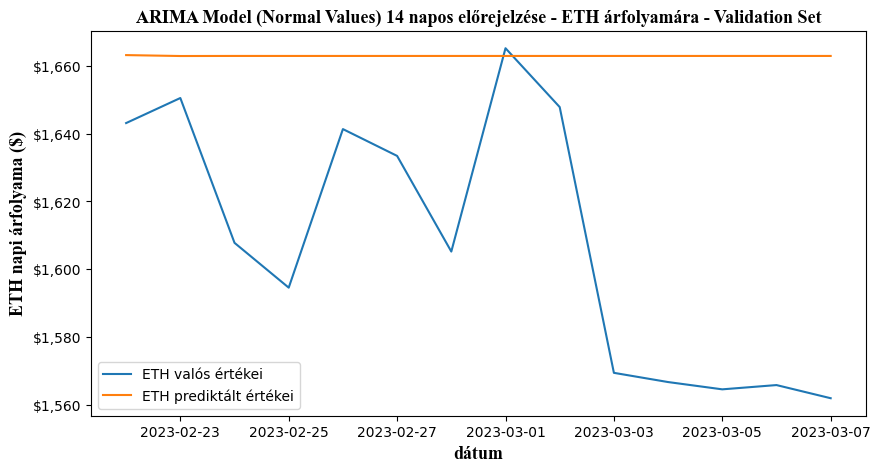

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}
ax.plot(true_values, label="ETH valós értékei")
ax.plot(fcast, label="ETH prediktált értékei")
ax.legend()
ax.yaxis.set_major_formatter("${x:,.0f}")
ax.set_ylabel("ETH napi árfolyama ($)", **font)
ax.set_xlabel("dátum", **font)

ax.set_title("ARIMA Model (Normal Values) 14 napos előrejelzése - ETH árfolyamára - Validation Set", **font)
plt.savefig("charts/forecast/arima_noseasonality_normalval_example.png")
plt.show()

# _______________________________________________________________

### Without seasonality, Log Values

### 1, 3, 7, 14 DAY

In [19]:
train_pred, true_values, fcast, confint = gridsearch_timeseriessplit_arima(df_close, n_splits=403, is_logarithmic=True, with_seasonality=False, test_size=1)
print("-"*15)
train_pred, true_values, fcast, confint = gridsearch_timeseriessplit_arima(df_close, n_splits=round(403/3), is_logarithmic=True, with_seasonality=False, test_size=3)
print("-"*15)
train_pred, true_values, fcast, confint = gridsearch_timeseriessplit_arima(df_close, n_splits=round(403/7), is_logarithmic=True, with_seasonality=False, test_size=7)
print("-"*15)
train_pred, true_values, fcast, confint = gridsearch_timeseriessplit_arima(df_close, n_splits=round(403/14), is_logarithmic=True, with_seasonality=False, test_size=14)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2013
Model:               SARIMAX(2, 1, 0)   Log Likelihood                3088.204
Date:                Sun, 12 Nov 2023   AIC                          -6170.407
Time:                        15:15:01   BIC                          -6153.587
Sample:                    09-01-2017   HQIC                         -6164.233
                         - 03-06-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0641      0.015     -4.189      0.000      -0.094      -0.034
ar.L2          0.0547      0.020      2.676      0.007       0.015       0.095
sigma2         0.0027   3.41e-05     79.768      0.0

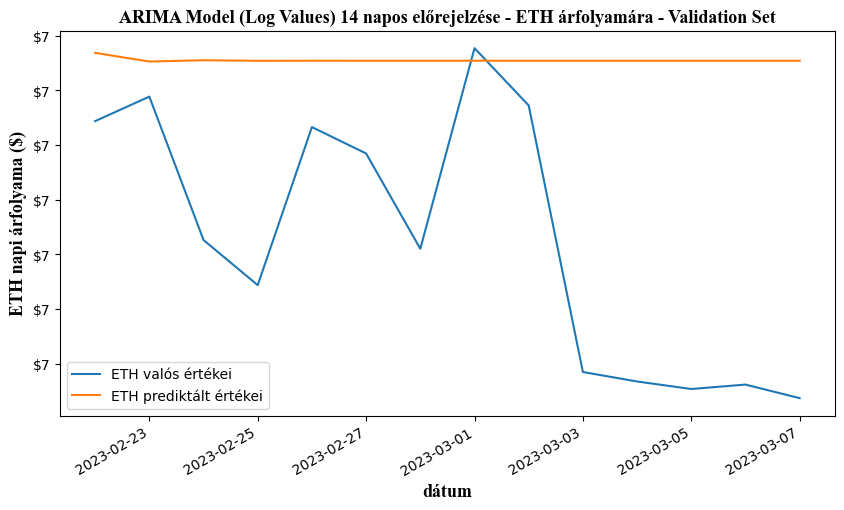

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}
ax.plot(true_values, label="ETH valós értékei")
ax.plot(fcast, label="ETH prediktált értékei")
ax.legend()
ax.yaxis.set_major_formatter("${x:,.0f}")
ax.set_ylabel("ETH napi árfolyama ($)", **font)
ax.set_xlabel("dátum", **font)

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_title("ARIMA Model (Log Values) 14 napos előrejelzése - ETH árfolyamára - Validation Set", **font)
plt.savefig("charts/forecast/arima_noseasonality_logval_example.png")
plt.show()

# _______________________________________________________________

### With seasonality, Normal Values

### 1, 3, 7, 14 DAY

In [16]:
train_pred, true_values, fcast, confint = gridsearch_timeseriessplit_arima(df_close, n_splits=403, is_logarithmic=False, with_seasonality=True, test_size=1)
print("-"*15)
train_pred, true_values, fcast, confint = gridsearch_timeseriessplit_arima(df_close, n_splits=round(403/3), is_logarithmic=False, with_seasonality=True, test_size=3)
print("-"*15)
train_pred, true_values, fcast, confint = gridsearch_timeseriessplit_arima(df_close, n_splits=round(403/7), is_logarithmic=False, with_seasonality=True, test_size=7)
print("-"*15)
train_pred, true_values, fcast, confint = gridsearch_timeseriessplit_arima(df_close, n_splits=round(403/14), is_logarithmic=False, with_seasonality=True, test_size=14)

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 2013
Model:             SARIMAX(1, 1, 0)x(1, 0, [1], 14)   Log Likelihood              -11604.556
Date:                              Sun, 12 Nov 2023   AIC                          23217.112
Time:                                      22:48:04   BIC                          23239.539
Sample:                                  09-01-2017   HQIC                         23225.344
                                       - 03-06-2023                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0780      0.012     -6.764      0.000      -0.101      -0.055
ar.S.L14      -0.75


KeyboardInterrupt



In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}
ax.plot(true_values, label="ETH valós értékei")
ax.plot(fcast, label="ETH prediktált értékei")
ax.legend()
ax.yaxis.set_major_formatter("${x:,.0f}")
ax.set_ylabel("ETH napi árfolyama ($)", **font)
ax.set_xlabel("dátum", **font)

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_title("ARIMA Model (Log Values) 14 napos előrejelzése - ETH árfolyamára - Validation Set", **font)
plt.savefig("charts/forecast/arima_seasonality_normalval_example.png")
plt.show()

# _______________________________________________________________

### With seasonality, Log Values

### 1, 3, 7, 14 DAY

In [ ]:
train_pred, true_values, fcast, confint = gridsearch_timeseriessplit_arima(df_close, n_splits=403, is_logarithmic=True, with_seasonality=True, test_size=1)
print("-"*15)
train_pred, true_values, fcast, confint = gridsearch_timeseriessplit_arima(df_close, n_splits=round(403/3), is_logarithmic=True, with_seasonality=True, test_size=3)
print("-"*15)
train_pred, true_values, fcast, confint = gridsearch_timeseriessplit_arima(df_close, n_splits=round(403/7), is_logarithmic=True, with_seasonality=True, test_size=7)
print("-"*15)
train_pred, true_values, fcast, confint = gridsearch_timeseriessplit_arima(df_close, n_splits=round(403/14), is_logarithmic=True, with_seasonality=True, test_size=14)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}
ax.plot(true_values, label="ETH valós értékei")
ax.plot(fcast, label="ETH prediktált értékei")
ax.legend()
ax.yaxis.set_major_formatter("${x:,.0f}")
ax.set_ylabel("ETH napi árfolyama ($)", **font)
ax.set_xlabel("dátum", **font)

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_title("ARIMA Model (Log Values) 14 napos előrejelzése - ETH árfolyamára - Validation Set", **font)
plt.savefig("charts/forecast/arima_seasonality_normalval_example.png")
plt.show()

## Test on Real-World dataset

## 1 day real world prediction

In [ ]:
import yfinance as yf

# Define the ticker symbol
tickerSymbol = 'ETH-USD'

# Get data for this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2023-03-07', end='2023-03-24')

eth_current_price = pd.DataFrame(tickerDf)


In [ ]:
eth_current_price.index = pd.to_datetime(eth_current_price.index)

In [ ]:
eth_current_price["2023-03-08":]

In [ ]:
eth_current_price = eth_current_price[pd.to_datetime("2023-03-08"):pd.to_datetime("2023-03-08") + pd.Timedelta(days=0)] ## 1 day

In [ ]:
eth_current_price["logclose"] = np.log(eth_current_price.Close)

In [ ]:
eth_current_price = pd.DataFrame(eth_current_price[["Close", "logclose"]])

In [ ]:
eth_current_price.rename(columns={"Close": "eth_close"}, inplace=True)

In [ ]:
eth_current_price.head()

In [ ]:
train = df_close.copy()

In [ ]:
model = pm.auto_arima(train["eth_close"],
          error_action="ignore",
          suppress_warnings=True,
          maxiter=10,
          seasonal=False,
          n_jobs=-1)

In [ ]:
eth_current_price["prediction"] = model.predict(n_periods=len(eth_current_price))

In [ ]:
## Validation Root Mean Squared Error
mean_squared_error(eth_current_price['eth_close'], eth_current_price["prediction"], squared=False)

In [ ]:
## Validation Mean Squared Error
mean_squared_error(eth_current_price['eth_close'], eth_current_price["prediction"], squared=True)

In [ ]:
## Validation Mean Absolute Error
mean_absolute_error(eth_current_price['eth_close'], eth_current_price["prediction"])

In [ ]:
## Validation Mean Absolute Percentage Error
mean_absolute_percentage_error(eth_current_price['eth_close'], eth_current_price["prediction"])

## 3 day real world prediction

In [ ]:
import yfinance as yf

# Define the ticker symbol
tickerSymbol = 'ETH-USD'

# Get data for this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2023-03-07', end='2023-03-24')

eth_current_price = pd.DataFrame(tickerDf)


In [ ]:
eth_current_price.index = pd.to_datetime(eth_current_price.index)

In [ ]:
eth_current_price = eth_current_price[pd.to_datetime("2023-03-08"):pd.to_datetime("2023-03-08") + pd.Timedelta(days=2)] ## 3 day

In [ ]:
eth_current_price["logclose"] = np.log(eth_current_price.Close)

In [ ]:
eth_current_price = pd.DataFrame(eth_current_price[["Close", "logclose"]])

In [ ]:
eth_current_price.rename(columns={"Close": "eth_close"}, inplace=True)

In [ ]:
eth_current_price.head()

In [ ]:
train = df_close.copy()

In [ ]:
model = pm.auto_arima(train["eth_close"],
          error_action="ignore",
          suppress_warnings=True,
          maxiter=10,
          seasonal=False,
          n_jobs=-1)

In [ ]:
eth_current_price["prediction"] = model.predict(n_periods=len(eth_current_price))

In [ ]:
## Validation Root Mean Squared Error
mean_squared_error(eth_current_price['eth_close'], eth_current_price["prediction"], squared=False)

In [ ]:
## Validation Mean Squared Error
mean_squared_error(eth_current_price['eth_close'], eth_current_price["prediction"], squared=True)

In [ ]:
## Validation Mean Absolute Error
mean_absolute_error(eth_current_price['eth_close'], eth_current_price["prediction"])

In [ ]:
## Validation Mean Absolute Percentage Error
mean_absolute_percentage_error(eth_current_price['eth_close'], eth_current_price["prediction"])

## 7 day real world prediction

In [ ]:
import yfinance as yf

# Define the ticker symbol
tickerSymbol = 'ETH-USD'

# Get data for this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2023-03-07', end='2023-03-24')
eth_current_price = pd.DataFrame(tickerDf)


In [ ]:
eth_current_price.index = pd.to_datetime(eth_current_price.index)

In [ ]:
eth_current_price = eth_current_price[pd.to_datetime("2023-03-08"):pd.to_datetime("2023-03-08") + pd.Timedelta(days=6)] ## 1 day

In [ ]:
eth_current_price["logclose"] = np.log(eth_current_price.Close)

In [ ]:
eth_current_price = pd.DataFrame(eth_current_price[["Close", "logclose"]])

In [ ]:
eth_current_price.rename(columns={"Close": "eth_close"}, inplace=True)

In [ ]:
eth_current_price.head()

In [ ]:
train = df_close.copy()

In [ ]:
model = pm.auto_arima(train["eth_close"],
          error_action="ignore",
          suppress_warnings=True,
          maxiter=10,
          seasonal=False,
          n_jobs=-1)

In [ ]:
eth_current_price["prediction"] = model.predict(n_periods=len(eth_current_price))

In [ ]:
## Validation Root Mean Squared Error
mean_squared_error(eth_current_price['eth_close'], eth_current_price["prediction"], squared=False)

In [ ]:
## Validation Mean Squared Error
mean_squared_error(eth_current_price['eth_close'], eth_current_price["prediction"], squared=True)

In [ ]:
## Validation Mean Absolute Error
mean_absolute_error(eth_current_price['eth_close'], eth_current_price["prediction"])

In [ ]:
## Validation Mean Absolute Percentage Error
mean_absolute_percentage_error(eth_current_price['eth_close'], eth_current_price["prediction"])

## 14 day real world prediction

In [ ]:
import yfinance as yf

# Define the ticker symbol
tickerSymbol = 'ETH-USD'

# Get data for this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2023-03-07', end='2023-03-24')

eth_current_price = pd.DataFrame(tickerDf)


In [ ]:
eth_current_price.index = pd.to_datetime(eth_current_price.index)

In [ ]:
eth_current_price = eth_current_price[pd.to_datetime("2023-03-08"):pd.to_datetime("2023-03-08") + pd.Timedelta(days=13)] ## 1 day

In [ ]:
eth_current_price["logclose"] = np.log(eth_current_price.Close)

In [ ]:
eth_current_price = pd.DataFrame(eth_current_price[["Close", "logclose"]])

In [ ]:
eth_current_price.rename(columns={"Close": "eth_close"}, inplace=True)

In [ ]:
eth_current_price.head()

In [ ]:
train = df_close.copy()

In [ ]:
model = pm.auto_arima(train["eth_close"],
          error_action="ignore",
          suppress_warnings=True,
          maxiter=10,
          seasonal=False,
          n_jobs=-1)

In [ ]:
eth_current_price["prediction"] = model.predict(n_periods=len(eth_current_price))

In [ ]:
## Validation Root Mean Squared Error
mean_squared_error(eth_current_price['eth_close'], eth_current_price["prediction"], squared=False)

In [ ]:
## Validation Mean Squared Error
mean_squared_error(eth_current_price['eth_close'], eth_current_price["prediction"], squared=True)

In [ ]:
## Validation Mean Absolute Error
mean_absolute_error(eth_current_price['eth_close'], eth_current_price["prediction"])

In [ ]:
## Validation Mean Absolute Percentage Error
mean_absolute_percentage_error(eth_current_price['eth_close'], eth_current_price["prediction"])

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
font = {'fontname':'Times New Roman', 'size': 13, 'weight' : 'bold'}
ax.plot(eth_current_price['eth_close'], label="ETH valós értékei")
ax.plot( eth_current_price["prediction"], label="ETH prediktált értékei")
ax.legend()
ax.yaxis.set_major_formatter("${x:,.0f}")
ax.set_ylabel("ETH napi árfolyama ($)", **font)
ax.set_xlabel("dátum", **font)

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_title("ARIMA Model (Log Values) 14 napos előrejelzése - ETH árfolyamára - Test Set", **font)
plt.savefig("charts/forecast/arima_realworld_example.png")
plt.show()

## With exogeneous features (but it can't be applied on crypto era)

In [ ]:
test_size = 400 ## 20% of total dataset
train = df.iloc[:-test_size]["log_close"]
test = df.iloc[-test_size:]["log_close"]

In [ ]:
model = pm.auto_arima(y=train.eth_close, X=train.drop(["eth_close"], axis=1),
                      error_action="ignore",
                      trace=True,
                      suppress_warnings=True,
                      maxiter=10,
                      seasonal=False)

In [ ]:
model.summary()

In [ ]:
test.head()

In [ ]:
def plot_test(model, test):
    test_pred = model.predict(X = test.drop("eth_close", axis=1), n_periods=test_size)

    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(test.index, test.eth_close, label='true')
    ax.plot(test.index, test_pred.values, label='forecast')
    ax.legend();

In [ ]:
plot_test(model, test)

In [ ]:
def rmse(y, t):
    return np.sqrt(np.mean((t - y)**2))

In [ ]:
print("RMSE ARIMA:", rmse(model.predict(X = test.drop("eth_close", axis=1), n_periods=test_size), test.eth_close))